In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 0, 1, 0], [1, 0, 0, 1], [0, 1, 1, 1], [0, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 0, 1, 1], [0, 1, 1, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49614 stdev: 0.05957
Best fitness: 0.68460 - size: (2, 13) - species 2 - id 39
Average adjusted fitness: 0.168
Mean genetic distance 2.856, standard deviation 0.472
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.192 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51931 stdev: 0.06247
Best fitness: 0.69388 - size: (2, 14) - species 2 - id 382
Average adjusted fitness: 0.204
Mean genetic distance 2.989, standard deviation 0.482
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.924 sec (19.558 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54103 stdev: 0.06385
Best fitness: 0.70686 - size: (3, 15) - species 2 - id 538
Average adjusted fitness: 0.143
Mean genetic distance 3.013, standard deviation 0.492
Population of 202 members in 28 species
Total extinct

Population's average fitness: 0.60387 stdev: 0.07886
Best fitness: 0.73098 - size: (5, 17) - species 31 - id 2910
Average adjusted fitness: 0.180
Mean genetic distance 3.298, standard deviation 0.511
Population of 189 members in 31 species
Total extinctions: 0
Generation time: 50.488 sec (31.974 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61348 stdev: 0.07966
Best fitness: 0.73098 - size: (5, 17) - species 31 - id 2910
Average adjusted fitness: 0.278
Mean genetic distance 3.281, standard deviation 0.517
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 38.638 sec (33.326 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60769 stdev: 0.07986
Best fitness: 0.73098 - size: (5, 17) - species 31 - id 2910
Average adjusted fitness: 0.212
Mean genetic distance 3.261, standard deviation 0.519
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 37.095 sec (34.457 average)

 

Population's average fitness: 0.62111 stdev: 0.07683
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.197
Mean genetic distance 3.206, standard deviation 0.558
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 45.464 sec (45.215 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61233 stdev: 0.08239
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.155
Mean genetic distance 3.210, standard deviation 0.540
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 46.490 sec (45.472 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61756 stdev: 0.08205
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.202
Mean genetic distance 3.175, standard deviation 0.547
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 48.112 sec (45.955 average)

 ***

Population's average fitness: 0.62154 stdev: 0.08960
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.246
Mean genetic distance 3.255, standard deviation 0.584
Population of 206 members in 21 species
Total extinctions: 0
Generation time: 56.211 sec (50.857 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.62806 stdev: 0.08815
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.163
Mean genetic distance 3.254, standard deviation 0.604
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 51.991 sec (51.288 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.61793 stdev: 0.09385
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.187
Mean genetic distance 3.245, standard deviation 0.592
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 47.664 sec (51.252 average)

 ***

Population's average fitness: 0.61990 stdev: 0.09044
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.205
Mean genetic distance 3.117, standard deviation 0.629
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 39.468 sec (40.135 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.62598 stdev: 0.09267
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.212
Mean genetic distance 3.118, standard deviation 0.629
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 40.633 sec (40.218 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.62228 stdev: 0.09247
Best fitness: 0.78602 - size: (6, 21) - species 1 - id 5993
Average adjusted fitness: 0.185
Mean genetic distance 3.097, standard deviation 0.609
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 39.604 sec (40.136 average)

 ***

Population's average fitness: 0.61082 stdev: 0.09153
Best fitness: 0.78726 - size: (9, 28) - species 78 - id 18289
Average adjusted fitness: 0.174
Mean genetic distance 3.056, standard deviation 0.572
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 38.350 sec (39.195 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.61627 stdev: 0.09381
Best fitness: 0.79592 - size: (20, 51) - species 63 - id 19286
Average adjusted fitness: 0.251
Mean genetic distance 3.057, standard deviation 0.569
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 39.114 sec (39.107 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.60856 stdev: 0.08982
Best fitness: 0.79592 - size: (20, 51) - species 63 - id 19286
Average adjusted fitness: 0.257
Mean genetic distance 3.052, standard deviation 0.572
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 39.357 sec (39.046 aver

Population's average fitness: 0.62462 stdev: 0.10203
Best fitness: 0.80519 - size: (12, 32) - species 89 - id 22898
Average adjusted fitness: 0.257
Mean genetic distance 3.119, standard deviation 0.537
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 39.202 sec (39.198 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.62638 stdev: 0.10164
Best fitness: 0.81509 - size: (13, 36) - species 89 - id 23399
Average adjusted fitness: 0.268
Mean genetic distance 3.107, standard deviation 0.527
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 40.028 sec (39.473 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.63394 stdev: 0.10173
Best fitness: 0.81509 - size: (13, 36) - species 89 - id 23399
Average adjusted fitness: 0.252
Mean genetic distance 3.118, standard deviation 0.530
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 40.758 sec (39.740 ave

Population's average fitness: 0.66529 stdev: 0.10389
Best fitness: 0.81571 - size: (6, 24) - species 24 - id 1945
Average adjusted fitness: 0.334
Mean genetic distance 3.179, standard deviation 0.492
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 28.192 sec (27.460 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66182 stdev: 0.10699
Best fitness: 0.81571 - size: (6, 24) - species 24 - id 1945
Average adjusted fitness: 0.272
Mean genetic distance 3.168, standard deviation 0.495
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 27.446 sec (27.570 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66044 stdev: 0.10888
Best fitness: 0.82993 - size: (6, 20) - species 32 - id 2926
Average adjusted fitness: 0.264
Mean genetic distance 3.181, standard deviation 0.492
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 28.225 sec (27.679 average)

 

Population's average fitness: 0.65502 stdev: 0.11237
Best fitness: 0.84725 - size: (9, 28) - species 32 - id 5790
Average adjusted fitness: 0.260
Mean genetic distance 3.244, standard deviation 0.554
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 32.610 sec (32.401 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.67140 stdev: 0.11117
Best fitness: 0.84725 - size: (9, 28) - species 32 - id 5790
Average adjusted fitness: 0.296
Mean genetic distance 3.278, standard deviation 0.564
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 33.559 sec (32.606 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.66034 stdev: 0.11426
Best fitness: 0.84725 - size: (9, 28) - species 32 - id 5790
Average adjusted fitness: 0.360
Mean genetic distance 3.248, standard deviation 0.567
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 35.135 sec (32.962 average)

 

Population's average fitness: 0.65785 stdev: 0.11472
Best fitness: 0.86271 - size: (11, 32) - species 32 - id 9715
Average adjusted fitness: 0.226
Mean genetic distance 3.392, standard deviation 0.611
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 40.313 sec (38.612 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.65856 stdev: 0.11377
Best fitness: 0.86271 - size: (11, 32) - species 32 - id 9715
Average adjusted fitness: 0.254
Mean genetic distance 3.387, standard deviation 0.587
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 38.609 sec (38.609 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.65781 stdev: 0.11091
Best fitness: 0.86271 - size: (11, 32) - species 32 - id 9715
Average adjusted fitness: 0.233
Mean genetic distance 3.360, standard deviation 0.585
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 39.352 sec (38.583 average)

Population's average fitness: 0.67927 stdev: 0.12292
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.244
Mean genetic distance 3.196, standard deviation 0.592
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 41.297 sec (41.895 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.68998 stdev: 0.12457
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.267
Mean genetic distance 3.200, standard deviation 0.572
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 40.232 sec (41.680 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.69439 stdev: 0.12158
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.323
Mean genetic distance 3.208, standard deviation 0.587
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 40.763 sec (41.563 avera

Population's average fitness: 0.68960 stdev: 0.13500
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.365
Mean genetic distance 3.117, standard deviation 0.567
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 43.292 sec (43.590 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.68522 stdev: 0.13146
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.238
Mean genetic distance 3.110, standard deviation 0.575
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 44.525 sec (43.662 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.67405 stdev: 0.13686
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.315
Mean genetic distance 3.067, standard deviation 0.577
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 42.930 sec (43.666 ave

Population's average fitness: 0.69453 stdev: 0.12230
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.209
Mean genetic distance 3.073, standard deviation 0.564
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 44.553 sec (46.109 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.69221 stdev: 0.13243
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.303
Mean genetic distance 3.070, standard deviation 0.569
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 45.163 sec (45.936 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.69765 stdev: 0.12944
Best fitness: 0.88250 - size: (15, 38) - species 64 - id 13387
Average adjusted fitness: 0.253
Mean genetic distance 3.069, standard deviation 0.556
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 46.196 sec (45.951 ave

Population's average fitness: 0.61267 stdev: 0.09638
Best fitness: 0.76871 - size: (4, 20) - species 2 - id 1734
Average adjusted fitness: 0.269
Mean genetic distance 3.097, standard deviation 0.508
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 25.781 sec (25.036 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61483 stdev: 0.10056
Best fitness: 0.76871 - size: (4, 20) - species 2 - id 1734
Average adjusted fitness: 0.250
Mean genetic distance 3.115, standard deviation 0.503
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 26.029 sec (25.249 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62481 stdev: 0.09334
Best fitness: 0.76871 - size: (4, 20) - species 2 - id 1734
Average adjusted fitness: 0.310
Mean genetic distance 3.102, standard deviation 0.492
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 26.687 sec (25.498 average)

 ***

Population's average fitness: 0.64520 stdev: 0.10386
Best fitness: 0.80210 - size: (6, 26) - species 41 - id 3490
Average adjusted fitness: 0.302
Mean genetic distance 3.232, standard deviation 0.498
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 30.325 sec (29.239 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63148 stdev: 0.10992
Best fitness: 0.80210 - size: (6, 26) - species 41 - id 3490
Average adjusted fitness: 0.267
Mean genetic distance 3.257, standard deviation 0.490
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 30.414 sec (29.419 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64249 stdev: 0.10805
Best fitness: 0.80210 - size: (6, 26) - species 41 - id 3490
Average adjusted fitness: 0.273
Mean genetic distance 3.274, standard deviation 0.502
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 30.976 sec (29.668 average)

 

Population's average fitness: 0.63414 stdev: 0.11464
Best fitness: 0.80210 - size: (6, 26) - species 41 - id 3490
Average adjusted fitness: 0.279
Mean genetic distance 3.213, standard deviation 0.596
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 34.947 sec (34.306 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61777 stdev: 0.12174
Best fitness: 0.80210 - size: (6, 26) - species 41 - id 3490
Average adjusted fitness: 0.236
Mean genetic distance 3.223, standard deviation 0.603
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 33.757 sec (34.162 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.63175 stdev: 0.11038
Best fitness: 0.80210 - size: (6, 26) - species 41 - id 3490
Average adjusted fitness: 0.274
Mean genetic distance 3.188, standard deviation 0.618
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 36.429 sec (34.408 average)

 

Population's average fitness: 0.63382 stdev: 0.12190
Best fitness: 0.82251 - size: (19, 54) - species 47 - id 13053
Average adjusted fitness: 0.278
Mean genetic distance 3.263, standard deviation 0.593
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 40.334 sec (40.381 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.64502 stdev: 0.11754
Best fitness: 0.83426 - size: (20, 55) - species 47 - id 13225
Average adjusted fitness: 0.253
Mean genetic distance 3.262, standard deviation 0.585
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 40.647 sec (40.446 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.63635 stdev: 0.11755
Best fitness: 0.83426 - size: (20, 55) - species 66 - id 13225
Average adjusted fitness: 0.294
Mean genetic distance 3.252, standard deviation 0.583
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 40.496 sec (40.538 avera

Population's average fitness: 0.64325 stdev: 0.11985
Best fitness: 0.83426 - size: (20, 55) - species 66 - id 13225
Average adjusted fitness: 0.303
Mean genetic distance 3.299, standard deviation 0.680
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 50.315 sec (49.084 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.65499 stdev: 0.11615
Best fitness: 0.83426 - size: (20, 55) - species 66 - id 13225
Average adjusted fitness: 0.353
Mean genetic distance 3.266, standard deviation 0.666
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 52.219 sec (49.456 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.64993 stdev: 0.12505
Best fitness: 0.83426 - size: (20, 55) - species 66 - id 13225
Average adjusted fitness: 0.275
Mean genetic distance 3.217, standard deviation 0.685
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 49.604 sec (49.484 aver

Population's average fitness: 0.66421 stdev: 0.12145
Best fitness: 0.83612 - size: (22, 51) - species 69 - id 19244
Average adjusted fitness: 0.294
Mean genetic distance 3.220, standard deviation 0.639
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 55.544 sec (53.832 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.65998 stdev: 0.11902
Best fitness: 0.83612 - size: (22, 51) - species 69 - id 19244
Average adjusted fitness: 0.309
Mean genetic distance 3.239, standard deviation 0.635
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 53.446 sec (53.807 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.66045 stdev: 0.12128
Best fitness: 0.83859 - size: (21, 56) - species 66 - id 21593
Average adjusted fitness: 0.292
Mean genetic distance 3.235, standard deviation 0.618
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 54.915 sec (53.938 ave

Population's average fitness: 0.65594 stdev: 0.09484
Best fitness: 0.81509 - size: (2, 13) - species 16 - id 313
Average adjusted fitness: 0.349
Mean genetic distance 3.034, standard deviation 0.498
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 25.634 sec (23.055 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63892 stdev: 0.11894
Best fitness: 0.81509 - size: (2, 13) - species 16 - id 313
Average adjusted fitness: 0.341
Mean genetic distance 3.051, standard deviation 0.491
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 24.236 sec (23.203 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64327 stdev: 0.11417
Best fitness: 0.81509 - size: (2, 13) - species 16 - id 313
Average adjusted fitness: 0.375
Mean genetic distance 3.045, standard deviation 0.492
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 26.155 sec (23.531 average)

 *****

Population's average fitness: 0.65852 stdev: 0.11770
Best fitness: 0.81509 - size: (2, 13) - species 16 - id 313
Average adjusted fitness: 0.357
Mean genetic distance 3.071, standard deviation 0.547
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 27.321 sec (27.235 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65414 stdev: 0.12231
Best fitness: 0.81509 - size: (2, 13) - species 16 - id 313
Average adjusted fitness: 0.350
Mean genetic distance 3.085, standard deviation 0.562
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 29.064 sec (27.438 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64564 stdev: 0.12477
Best fitness: 0.81509 - size: (2, 13) - species 16 - id 313
Average adjusted fitness: 0.341
Mean genetic distance 3.084, standard deviation 0.557
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 27.067 sec (27.370 average)

 ***

Population's average fitness: 0.66161 stdev: 0.13800
Best fitness: 0.83859 - size: (6, 22) - species 39 - id 6845
Average adjusted fitness: 0.376
Mean genetic distance 3.213, standard deviation 0.528
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 30.062 sec (30.800 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.67297 stdev: 0.13459
Best fitness: 0.83859 - size: (6, 22) - species 39 - id 6845
Average adjusted fitness: 0.406
Mean genetic distance 3.209, standard deviation 0.535
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 30.184 sec (30.842 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.67174 stdev: 0.13493
Best fitness: 0.83859 - size: (6, 22) - species 39 - id 6845
Average adjusted fitness: 0.362
Mean genetic distance 3.203, standard deviation 0.541
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 30.683 sec (31.016 average)

 

Population's average fitness: 0.66010 stdev: 0.15678
Best fitness: 0.85591 - size: (13, 28) - species 44 - id 11195
Average adjusted fitness: 0.350
Mean genetic distance 3.163, standard deviation 0.586
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 34.104 sec (33.420 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.67806 stdev: 0.14415
Best fitness: 0.85591 - size: (13, 28) - species 44 - id 11195
Average adjusted fitness: 0.416
Mean genetic distance 3.171, standard deviation 0.573
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 35.364 sec (33.775 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.65743 stdev: 0.15899
Best fitness: 0.85591 - size: (13, 28) - species 44 - id 11195
Average adjusted fitness: 0.352
Mean genetic distance 3.151, standard deviation 0.569
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 35.501 sec (34.062 avera

Population's average fitness: 0.66801 stdev: 0.17260
Best fitness: 0.85838 - size: (11, 35) - species 69 - id 15078
Average adjusted fitness: 0.366
Mean genetic distance 3.138, standard deviation 0.516
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 32.721 sec (34.726 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.69977 stdev: 0.15013
Best fitness: 0.85838 - size: (11, 35) - species 69 - id 15078
Average adjusted fitness: 0.392
Mean genetic distance 3.154, standard deviation 0.518
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 33.305 sec (34.497 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.69030 stdev: 0.15105
Best fitness: 0.85838 - size: (11, 35) - species 69 - id 15078
Average adjusted fitness: 0.393
Mean genetic distance 3.120, standard deviation 0.507
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 33.661 sec (34.287 ave

Population's average fitness: 0.70013 stdev: 0.16056
Best fitness: 0.85838 - size: (11, 35) - species 64 - id 15078
Average adjusted fitness: 0.398
Mean genetic distance 3.166, standard deviation 0.554
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 29.835 sec (29.212 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.69092 stdev: 0.16336
Best fitness: 0.85838 - size: (11, 35) - species 64 - id 15078
Average adjusted fitness: 0.396
Mean genetic distance 3.161, standard deviation 0.537
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 28.955 sec (29.203 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.70351 stdev: 0.14615
Best fitness: 0.85838 - size: (11, 35) - species 64 - id 15078
Average adjusted fitness: 0.403
Mean genetic distance 3.152, standard deviation 0.525
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 29.118 sec (29.212 ave

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5611111111111111

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  2  0  0  0]
 [ 0  4  0  1  1  0  0  0  1  0]
 [ 0  2 17  0  3  3  1  5  0  0]
 [ 0  0  0  8  0  1  0  0  5  5]
 [ 0  2  0  4 12  0  0  2  1  0]
 [ 0  0  0  0  0  5  0  1  0  3]
 [ 1  2  0  0  2  0 13  0  2  0]
 [ 0  0  0  1  1  0  0 10  1  0]
 [ 0  9  0  0  1  0  2  1  7  0]
 [ 0  0  0  4  0  9  0  0  0 10]]


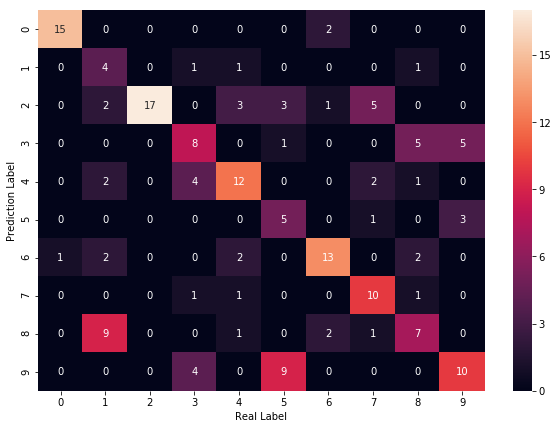

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5 9] real:5
#1 min_error:0 index:[2] real:2
#2 min_error:0 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[2] real:1
#5 min_error:0 index:[2] real:7
#6 min_error:0 index:[8] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[1 4] real:1
#10 min_error:0 index:[7] real:7
#11 min_error:1 index:[1 6] real:4
#12 min_error:0 index:[2] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:1 index:[1 4] real:1
#15 min_error:0 index:[3] real:3
#16 min_error:0 index:[5] real:9
#17 min_error:0 index:[4] real:1
#18 min_error:0 index:[8] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[8] real:8
#21 min_error:0 index:[2] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:1 index:[2 5] real:1
#24 min_error:0 index:[7] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:1 index:[2 5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[6] real:6
#29 min_error:0 index:[3] real:9
#30 min_

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.6116264687693259
Avg Base Learner:0.8512677798392083


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1
Accuracy on training set: 0.17777777777777778
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.4388888888888889


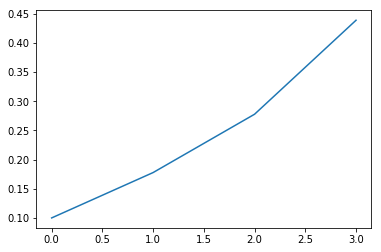

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.1, 0.17777777777777778, 0.2777777777777778, 0.4388888888888889]